In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
os.getcwd(),os.chdir(r'C:\Users\14049\WordAndStudy\Projects\学校\大三上\数字图像处理'),os.getcwd()

('C:\\Users\\14049\\WordAndStudy\\Projects\\学校\\大三上\\数字图像处理',
 None,
 'C:\\Users\\14049\\WordAndStudy\\Projects\\学校\\大三上\\数字图像处理')

# 读入图像并显示

In [19]:
img = cv2.imread(r'./jpg/natasha-taylor-180782-unsplash.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 修改图像为灰度图并保存图像

In [20]:
gimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',gimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
cv2.imwrite('./jpg/gray-natasha-taylor-180782-unsplash.jpg',gimg)

True

# 灰度图像 直方图与装箱直方图

In [22]:
# ：cv2.calcHist()
# help(cv2.calcHist)
# hist = cv2.calcHist([gimg],[0],None,[256],[0,256])
# plt.plot(hist);plt.show()

# plt.hist(gimg.ravel(),256,[0,256]); plt.show()

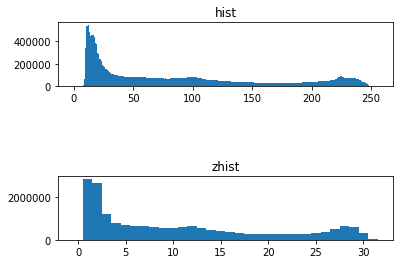

In [23]:
hist = cv2.calcHist([gimg],[0],None,[256],[0,256])
hist.shape = 256
histList = hist.tolist()

histSize = 8
tmpList = []
for i in range(0,256,8):
    tmpList.append(sum(histList[i:i+8]))

index = np.arange(0,256)
zindex = np.arange(0,256//8)

plt.subplot(311)
plt.bar(index,histList,width=1);
plt.title("hist")

plt.subplot(313)
plt.bar(zindex,tmpList,width=1);
plt.title('zhist')

plt.show()

# 彩色图像 直方图与装箱直方图

## 彩 直方图

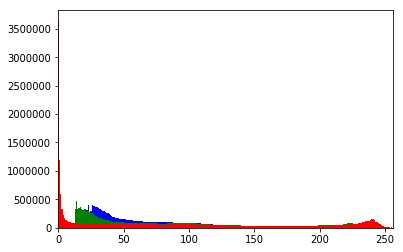

In [24]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    histr.shape = 256
    plt.bar(index,histr,width=1,color=col);
#     plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## 彩 装箱直方图

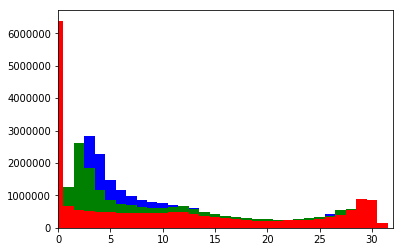

In [25]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    histr.shape = 256
    histList = histr.tolist()
    
    histSize = 8
    tmpList = []
    for i in range(0,256,8):
        tmpList.append(sum(histList[i:i+8]))

    plt.bar(zindex,tmpList,width=1,color=col);
#     plt.plot(histr,color = col)
    plt.xlim([0,256//histSize])
plt.show()

## 彩 累记直方图

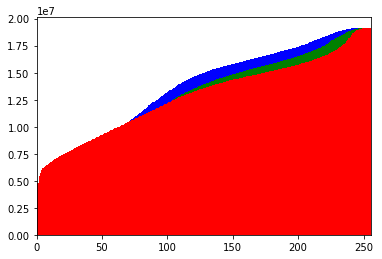

In [26]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    histr.shape = 256
    histList = histr.tolist()
    
    for i in range(1,256):
        histList[i] = histList[i] + histList[i-1]
    
    plt.bar(index,histList,width=1,color=col);
#    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()